Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


Data preparation

In [4]:
import tensorflow as tf 

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5,1.5],
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.1,
    dtype=None,
)

In [14]:
dire = '/content/gdrive/MyDrive/Kaggle/categorized_disorders'

train_generator = datagen.flow_from_directory(
    dire,
    batch_size=32,
    class_mode='categorical',                           
    target_size=(151,332),
    subset='training'
)

test_generator = datagen.flow_from_directory(
    dire,
    batch_size=32,
    class_mode='categorical',                           
    target_size=(151,332),
    subset='validation'
)

Found 91 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


Model

In [18]:
import os
import urllib.request

urllib.request.urlretrieve('https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                           'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
os.listdir()

['categorized_images',
 'models',
 'categorized_disorders',
 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5']

In [19]:
from keras.applications.vgg16 import VGG16, preprocess_input

vgg16_weight_path = '/content/gdrive/MyDrive/Kaggle/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

vgg = VGG16(
    weights = vgg16_weight_path,
    include_top = False, 
    input_shape = (151,332,3)
)

In [20]:
for layer in vgg.layers:
    layer.trainable = False

In [54]:
resnet = tf.keras.applications.ResNet152V2(
    input_shape=(151,332,3),
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [61]:
from keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

from keras.applications.resnet50 import ResNet50

model = Sequential()
model.add(vgg)
# model.add(resnet)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.2))
# model.add(Dense(64, activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(Flatten())
model.add(Dense(3,activation="softmax"))

In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 10, 512)        14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               2621568   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                

In [51]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [64]:
history = model.fit(
    train_generator,
    batch_size = 16,
    epochs = 25,
    # steps_per_epoch = 20,
    validation_data = test_generator
)

Epoch 1/25
3/3 [==============================] - 2s 629ms/step - loss: 14.2976 - accuracy: 0.3757 - val_loss: 3.6568 - val_accuracy: 0.6667
Epoch 2/25
3/3 [==============================] - 2s 499ms/step - loss: 5.6582 - accuracy: 0.7330 - val_loss: 1.4908 - val_accuracy: 0.7778
Epoch 3/25
3/3 [==============================] - 2s 497ms/step - loss: 4.8915 - accuracy: 0.7433 - val_loss: 5.8062e-04 - val_accuracy: 1.0000
Epoch 4/25
3/3 [==============================] - 2s 536ms/step - loss: 1.7306 - accuracy: 0.8499 - val_loss: 2.1423 - val_accuracy: 0.7778
Epoch 5/25
3/3 [==============================] - 2s 497ms/step - loss: 2.9196 - accuracy: 0.8307 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/25
3/3 [==============================] - 2s 501ms/step - loss: 2.5162 - accuracy: 0.8330 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/25
3/3 [==============================] - 2s 496ms/step - loss: 3.5408 - accuracy: 0.8732 - val_loss: 2.5290e-04 - val_accuracy: 1.0000
Epoch 8

In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


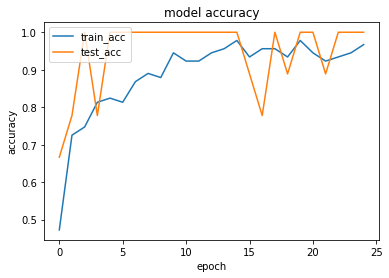

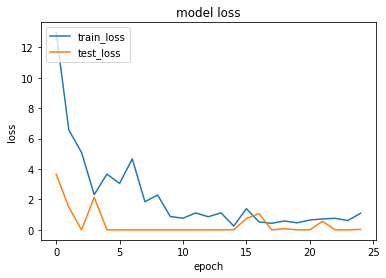

In [65]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'test_acc'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

In [ ]:
model.save('disorder_model.h5')